<a href="https://colab.research.google.com/github/Spirited-Coder/AI-Sign-Language-Recognition/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import math
import numpy as np

# **Geometric Random Variable**

In [22]:
def geometric(x, p):
    '''
    Function to plot a geometric distribution graph
    params:
        x: number of times the event does not occur before the first success (the trial number on which the first success occurs)
        p: probability of an event occurring on each trial (probability of success). It must be a number between 0 and 1.
    return: probability of success occurring on the x-th trial
    '''
    x = int(x)
    if x < 1:
        raise ValueError("The number must be positive!")

    if p < 0 and p > 1:
        raise ValueError("The probability should be between 0 and 1")

    probability = (1 - p) ** (x - 1) * p
    return probability

# **Bionomial Random Variable**
A binomial random variable counts the number of successes in a fixed number of independent trials, where each trial has only two possible outcomes: success or failure. The probability of success(p) remains constant across all trials

In [ ]:
def bionomial(n:int,p:float,value:int):
  """
  Calculate binomial probabilities.

  n: An integer representing the total number of trials.
  p: A float representing the probability of success on a single trial.
  value: An integer representing the desired number of successful outcomes.

  return: probabilities for the specified number of successes.

  """
  if not isinstance(n, int) or n <= 0:
    raise ValueError("n must be a positive integer")
  from math import comb  # Import the comb function from the math module
  probability=comb(n,value)*(p**value)*((1-p)**(n-value))

  """
  comb(n, value): Calculates the number of ways to choose value successes out of n trials.
  (p**value): Calculates the probability of getting value successes.
  ((1-p)**(n-value)): Calculates the probability of getting n - value failures.
  These three components are multiplied together according to the binomial probability formula.
  The result is stored in a  variable called probability.
  """
  return probability


# **Poisson Random Variables**
A Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space, given a known average rate of occurrence.
Key Parameters:
λ (lambda): The average rate of occurrence of the event. Probability Mass Function (PMF):
  P(X=k) = (e^(-λ) * λ^k) / k!
Cumulative Distribution Function (CDF):
The CDF is the sum of the PMF from 0 to k:
  P(X ≤ k) = Σ(i=0 to k) P(X=i)

In [ ]:
def poisson_pmf(k, lam):
  """Calculates the probability mass function of a Poisson distribution.

  Args:
    k: The number of events.
    lam: The average rate of occurrence.

  Returns:
    The probability of k events occurring.
  """

  return (math.exp(-lam) * lam**k) / math.factorial(k)

def poisson(k, lam):
  """Calculates the cumulative distribution function of a Poisson distribution.

  Args:
    k: The number of events.
    lam: The average rate of occurrence.

  Returns:
    The probability of k or fewer events occurring.
  """

  cdf = 0
  for i in range(k+1):
    cdf += poisson_pmf(i, lam)
  return cdf

In [20]:
def plot(name, res, start, end):
    fig = plt.figure(figsize=(10, 5))

    plt.bar(range(start, end+1), res, color='maroon', width=0.1)

    plt.xlabel('Number of trails')
    plt.ylabel('Probability')
    plt.title(f'{name.capitalize()} distribution')
    plt.xticks(range(start, end+1))
    plt.grid(True)

    plt.show()

Enter your distribution(Geometric, Binomial, Poisson, Uniform): binomial
Enter the start point: 1
Enter the end point: 10
Enter the number of successes we want to observe (where 0≤k≤n): 10
Enter the probability of success: 0.5


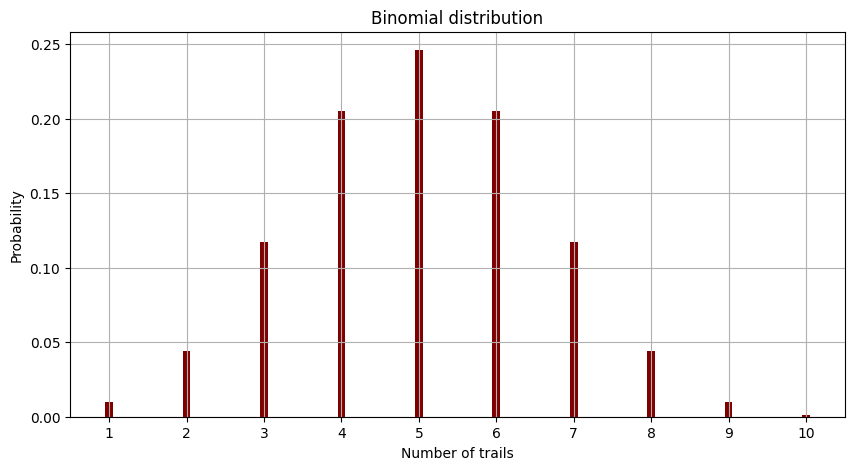

In [27]:
if __name__=='__main__':
    names = ['geometric', 'binomial', 'poisson', 'uniform']
    name = (input("Enter your distribution(Geometric, Binomial, Poisson, Uniform): ").lower())

    if name not in names:
        raise ValueError("Invalid distribution")

    start = int(input("Enter the start point: "))
    end = int(input("Enter the end point: "))

    res = []

    if name == 'geometric':
        p = float(input('Enter the probability of the event: '))
        res = [geometric(x, p) for x in range(start, end + 1)]
    elif name == 'binomial':
        k = int(input('Enter the number of successes we want to observe (where 0≤k≤n): '))
        p = float(input('Enter the probability of success: '))
        res = [binomial(k, p, x) for x in range(start, end + 1)]
    elif name == 'poisson':
        mu = int(input('Enter the average number of events'))
        res = [poisson(x, mu) for x in range(start, end + 1)]
    else:
        low = int(input('Enter the lower bound: '))
        high = int(input('Enter the upper bound: '))
        res = [uniform(x, p) for x in range(start, end + 1)]

    plot(name, res, start, end)